<a href="https://colab.research.google.com/github/nug1209/portfolio-projects-files/blob/main/accenture_social_media_views_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import data.

In [ ]:
df_content = pd.read_csv('https://raw.githubusercontent.com/nug-12/Accenture_Data_Analytics_Virtual_Experience/refs/heads/main/Content2024.csv')
df_reactions = pd.read_csv('https://raw.githubusercontent.com/nug-12/Accenture_Data_Analytics_Virtual_Experience/refs/heads/main/Reactions2024.csv')
df_reaction_types = pd.read_csv('https://raw.githubusercontent.com/nug-12/Accenture_Data_Analytics_Virtual_Experience/refs/heads/main/ReactionTypes2024.csv')

In [ ]:
print(df_content.head())
print('\n\n----------------\n\n')
print(df_reactions.head())
print('\n\n----------------\n\n')
print(df_reaction_types.head())

   Unnamed: 0                            Content ID  \
0           0  97522e57-d9ab-4bd6-97bf-c24d952602d2   
1           1  9f737e0a-3cdd-4d29-9d24-753f4e3be810   
2           2  230c4e4d-70c3-461d-b42c-ec09396efb3f   
3           3  356fff80-da4d-4785-9f43-bc1261031dc6   
4           4  01ab84dd-6364-4236-abbb-3f237db77180   

                                User ID   Type        Category  \
0  8d3cd87d-8a31-4935-9a4f-b319bfe05f31  photo        Studying   
1  beb1f34e-7870-46d6-9fc7-2e12eb83ce43  photo  healthy eating   
2  a5c65404-5894-4b87-82f2-d787cbee86b4  photo  healthy eating   
3  9fb4ce88-fac1-406c-8544-1a899cee7aaf  photo      technology   
4  e206e31b-5f85-4964-b6ea-d7ee5324def1  video            food   

                                                 URL  
0  https://socialbuzz.cdn.com/content/storage/975...  
1  https://socialbuzz.cdn.com/content/storage/9f7...  
2  https://socialbuzz.cdn.com/content/storage/230...  
3  https://socialbuzz.cdn.com/content/storage/356...

In [ ]:
print(df_content.shape)
print('----------------')
print(df_reactions.shape)
print('----------------')
print(df_reaction_types.shape)

(1000, 6)
----------------
(25553, 5)
----------------
(16, 4)


Drop rows with missing values.

In [ ]:
df_content = df_content.dropna()
df_reactions = df_reactions.dropna()
df_reaction_types = df_reaction_types.dropna()
print(df_content.shape)
print('----------------')
print(df_reactions.shape)
print('----------------')
print(df_reaction_types.shape)

(801, 6)
----------------
(22534, 5)
----------------
(16, 4)


Check columns and data types of the tables.

In [ ]:
print(df_content.info())
print('----------------')
print(df_reactions.info())
print('----------------')
print(df_reaction_types.info())

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    int64 
 1   Content ID  801 non-null    object
 2   User ID     801 non-null    object
 3   Type        801 non-null    object
 4   Category    801 non-null    object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 43.8+ KB
None
----------------
<class 'pandas.core.frame.DataFrame'>
Index: 22534 entries, 1 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  22534 non-null  int64 
 1   Content ID  22534 non-null  object
 2   User ID     22534 non-null  object
 3   Type        22534 non-null  object
 4   Datetime    22534 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB
None
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 

Convert the data di Datetime column to date type.

In [ ]:
df_reactions['Datetime'] = pd.to_datetime(df_reactions['Datetime'])
df_reactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22534 entries, 1 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  22534 non-null  int64         
 1   Content ID  22534 non-null  object        
 2   User ID     22534 non-null  object        
 3   Type        22534 non-null  object        
 4   Datetime    22534 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.0+ MB


Delete unused columns.

In [ ]:
df_content = df_content.drop(columns=['Unnamed: 0', 'User ID', 'URL'])
df_reactions = df_reactions.drop(columns=['Unnamed: 0', 'User ID'])
df_reaction_types = df_reaction_types.drop(columns=['Unnamed: 0'])

print(df_content.head())
print('\n\n----------------\n\n')
print(df_reactions.head())
print('\n\n----------------\n\n')
print(df_reaction_types.head())

                             Content ID   Type        Category
0  97522e57-d9ab-4bd6-97bf-c24d952602d2  photo        Studying
1  9f737e0a-3cdd-4d29-9d24-753f4e3be810  photo  healthy eating
2  230c4e4d-70c3-461d-b42c-ec09396efb3f  photo  healthy eating
3  356fff80-da4d-4785-9f43-bc1261031dc6  photo      technology
4  01ab84dd-6364-4236-abbb-3f237db77180  video            food


----------------


                             Content ID        Type            Datetime
1  97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust 2020-11-07 09:43:50
2  97522e57-d9ab-4bd6-97bf-c24d952602d2     dislike 2021-06-17 12:22:51
3  97522e57-d9ab-4bd6-97bf-c24d952602d2      scared 2021-04-18 05:13:58
4  97522e57-d9ab-4bd6-97bf-c24d952602d2     disgust 2021-01-06 19:13:01
5  97522e57-d9ab-4bd6-97bf-c24d952602d2  interested 2020-08-23 12:25:58


----------------


         Type Sentiment  Score
0       heart  positive     60
1        want  positive     70
2     disgust  negative      0
3        hate  negative 

Change several column names.

In [ ]:
df_content = df_content.rename(columns={'Type': 'Content_Type', 'Content ID': 'Content_ID'})
df_reactions = df_reactions.rename(columns={'Type': 'Reaction_Type', 'Content ID': 'Content_ID'})
df_reaction_types = df_reaction_types.rename(columns={'Type': 'Reaction_Type'})

Check unique values inside columns.

In [ ]:
print(df_content['Content_Type'].unique())
print(df_content['Category'].unique())
print(df_reactions['Reaction_Type'].unique())
print(df_reaction_types['Sentiment'].unique())

['photo' 'video' 'audio' 'GIF']
['Studying' 'healthy eating' 'technology' 'food' 'dogs' 'soccer'
 'public speaking' 'tennis' 'travel' 'education' 'studying' 'science'
 'veganism' 'cooking' 'animals' 'fitness' 'culture']
['disgust' 'dislike' 'scared' 'interested' 'peeking' 'cherish' 'hate'
 'indifferent' 'super love' 'worried' 'like' 'heart' 'want' 'intrigued'
 'love' 'adore']
['positive' 'negative' 'neutral']


Set the values to lowercase.

In [ ]:
df_content['Content_Type'] = df_content['Content_Type'].str.lower()
df_content['Category'] = df_content['Category'].str.lower()
print(df_content['Content_Type'].unique())
print(df_content['Category'].unique())

['photo' 'video' 'audio' 'gif']
['studying' 'healthy eating' 'technology' 'food' 'dogs' 'soccer'
 'public speaking' 'tennis' 'travel' 'education' 'science' 'veganism'
 'cooking' 'animals' 'fitness' 'culture']


Merge all tables

In [ ]:
df = pd.merge(df_content, df_reactions, on='Content_ID')
df = pd.merge(df, df_reaction_types, on='Reaction_Type')
df.shape

(18384, 7)

In [ ]:
df.head()

,Content_ID,Content_Type,Category,Reaction_Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30


Get the total scores for each category.

In [ ]:
grouped = df.groupby('Category')['Score'].sum().reset_index()
grouped.sort_values(by='Score', ascending=False)

,Category,Score
14,travel,53935
9,science,53657
7,healthy eating,52745
0,animals,52443
1,cooking,49681
2,culture,47710
6,food,47576
12,technology,46683
4,education,45103
13,tennis,43612


Export results to CSV.

In [ ]:
df.to_csv('df1.csv', index=False)
grouped.to_csv('df2.csv', index=False)

Get the earliest reaction date for each post as the approximate post creation date and then merge the result to the main table.

In [ ]:
earliest_reaction = df.loc[df.groupby('Content_ID')['Datetime'].idxmin()]
earliest_reaction = earliest_reaction.rename(columns={'Datetime': "Content_Creation_Date"})
earliest_reaction = earliest_reaction[['Content_ID', 'Content_Creation_Date']]

df = pd.merge(df, earliest_reaction, on='Content_ID')
df = df.rename(columns={'Datetime': 'Reaction_Date'})
df.head()

,Content_ID,Content_Type,Category,Reaction_Type,Reaction_Date,Sentiment,Score,Content_Creation_Date
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0,2020-06-27 18:44:39
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10,2020-06-27 18:44:39
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15,2020-06-27 18:44:39
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0,2020-06-27 18:44:39
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30,2020-06-27 18:44:39


In [ ]:
df['Reaction_Date'].max()

Timestamp('2021-06-18 07:44:58')

In [ ]:
df['Reaction_Date'].min()

Timestamp('2020-06-18 08:07:22')

In [ ]:
df['Content_Creation_Day'] = df['Content_Creation_Date'].dt.day_name()
df['Content_Creation_Month'] = df['Content_Creation_Date'].dt.month_name()
df['Reaction_Day'] = df['Reaction_Date'].dt.day_name()
df['Reaction_Month'] = df['Reaction_Date'].dt.month_name()

df.head()

,Content_ID,Content_Type,Category,Reaction_Type,Reaction_Date,Sentiment,Score,Content_Creation_Date,Content_Creation_Day,Content_Creation_Month,Reaction_Day,Reaction_Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0,2020-06-27 18:44:39,Saturday,June,Saturday,November
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10,2020-06-27 18:44:39,Saturday,June,Thursday,June
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15,2020-06-27 18:44:39,Saturday,June,Sunday,April
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0,2020-06-27 18:44:39,Saturday,June,Wednesday,January
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30,2020-06-27 18:44:39,Saturday,June,Sunday,August


In [ ]:
g1 = df.groupby('Content_Type')['Content_ID'].count().reset_index().sort_values(by='Content_ID', ascending=False).rename(columns={'Content_ID': 'Reaction_Count'})

In [ ]:
g2 = df.groupby('Category')['Content_ID'].count().reset_index().sort_values(by='Content_ID', ascending=False).rename(columns={'Content_ID': 'Reaction_Count'})

In [ ]:
g3 = df.groupby('Content_Creation_Day')['Content_ID'].count().reset_index().sort_values(by='Content_ID', ascending=False).rename(columns={'Content_ID': "Reaction_Count"})

In [ ]:
g4 = df.groupby('Content_Type')['Content_ID'].nunique().reset_index().sort_values(by='Content_ID', ascending=False).rename(columns={'Content_ID': 'Content_Count'})

In [ ]:
g5 = df.groupby('Category')['Content_ID'].nunique().reset_index().sort_values(by='Content_ID', ascending=False).rename(columns={'Content_ID': 'Content_Count'})

In [ ]:
g6 = df.groupby('Content_Creation_Day')['Content_ID'].nunique().reset_index().sort_values(by='Content_ID', ascending=False).rename(columns={'Content_ID': 'Content_Count'})

In [ ]:
g7 = df.groupby('Content_Creation_Month')['Content_ID'].nunique().reset_index().sort_values(by='Content_ID', ascending=False).rename(columns={'Content_ID': 'Content_Count'})

In [ ]:
g8 = df.groupby('Category')['Score'].sum().reset_index().sort_values(by='Score', ascending=False).rename(columns={'Score': 'Total_Score'})

In [ ]:
g9 = df.groupby('Content_Type')['Score'].sum().reset_index().sort_values(by='Score', ascending=False).rename(columns={'Score': 'Total_Score'})

In [ ]:
g10 = df.groupby('Content_Creation_Month')['Content_ID'].count().reset_index().sort_values(by='Content_ID', ascending=False).rename(columns={'Content_ID': 'Reaction_Count'})

In [ ]:
content_type_group = pd.merge(g9, g4, on='Content_Type')
content_type_group = pd.merge(content_type_group, g1, on='Content_Type')
content_type_group


,Content_Type,Total_Score,Content_Count,Reaction_Count
0,photo,200323,208,5006
1,video,183402,199,4637
2,gif,175238,181,4465
3,audio,171962,184,4276


In [ ]:
category_group = pd.merge(g8, g5, on='Category')
category_group = pd.merge(category_group, g2, on='Category')
category_group


,Category,Total_Score,Content_Count,Reaction_Count
0,travel,53935,60,1368
1,science,53657,54,1351
2,healthy eating,52745,48,1303
3,animals,52443,52,1323
4,cooking,49681,50,1277
5,culture,47710,52,1217
6,food,47576,46,1183
7,technology,46683,51,1150
8,education,45103,46,1127
9,tennis,43612,50,1153


In [ ]:
content_creation_month_group = pd.merge(g10, g7, on='Content_Creation_Month')
content_creation_month_group

,Content_Creation_Month,Reaction_Count,Content_Count
0,June,12093,417
1,July,5260,245
2,August,794,60
3,September,150,20
4,October,45,11
5,January,17,4
6,December,9,4
7,November,7,3
8,February,4,3
9,March,2,2


In [ ]:
content_creation_day_group = pd.merge(g6, g3, on='Content_Creation_Day')
content_creation_day_group


,Content_Creation_Day,Content_Count,Reaction_Count
0,Friday,119,2948
1,Tuesday,117,2758
2,Saturday,116,2774
3,Monday,111,2716
4,Sunday,109,2660
5,Thursday,109,2533
6,Wednesday,91,1995


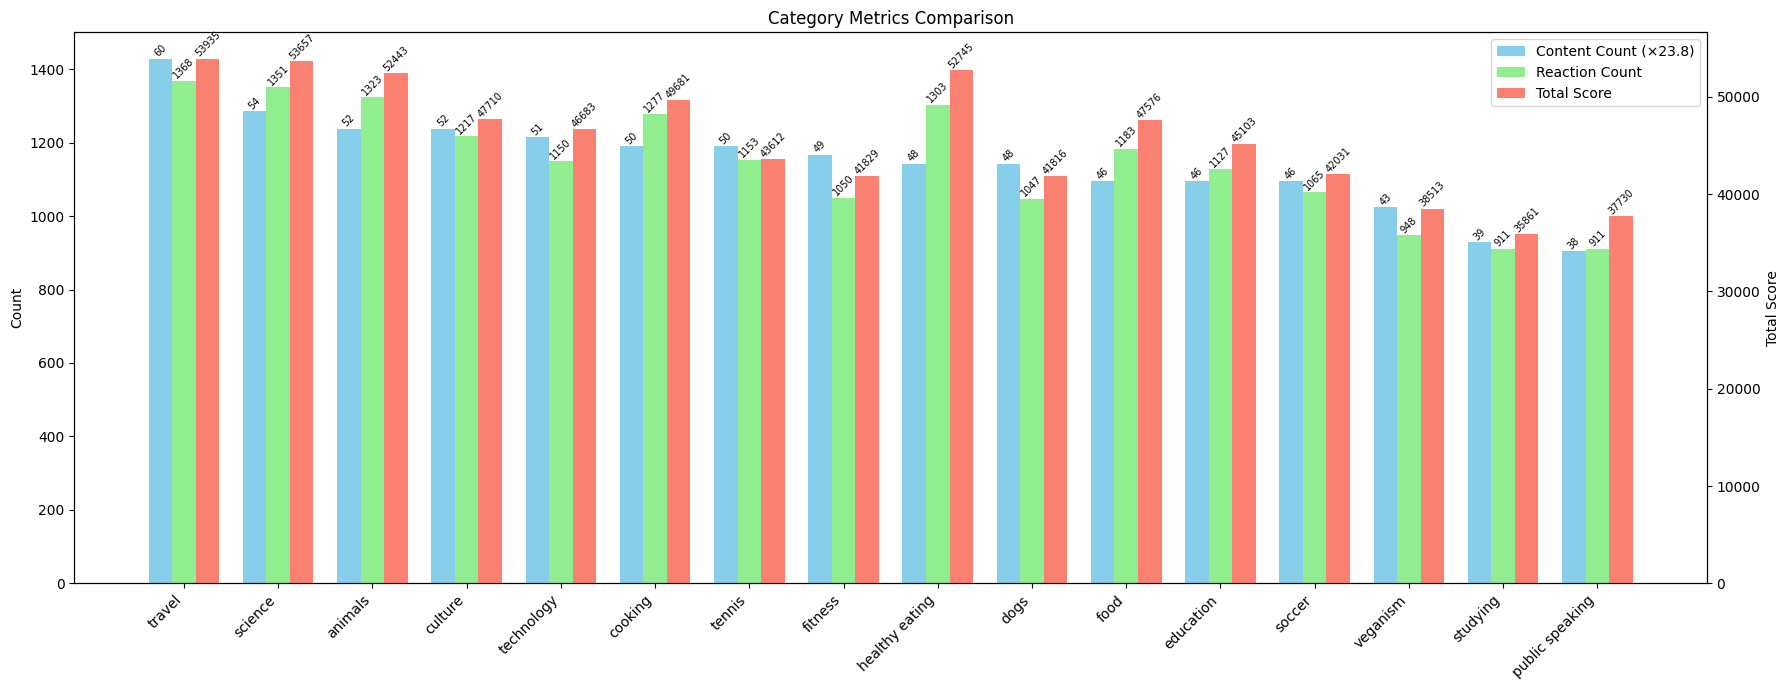

In [ ]:
def plot_clustered_bars(df):
    # Sort the dataframe by Content_Count in descending order
    df = df.sort_values('Content_Count', ascending=False).reset_index(drop=True)

    # Set the style and figure size
    # plt.style.use('seaborn')
    fig, ax1 = plt.subplots(figsize=(18, 7))

    # Calculate scaling factor to make Content_Count more visible
    # Scale Content_Count to be roughly in the same range as Reaction_Count
    scale_factor = df['Reaction_Count'].mean() / df['Content_Count'].mean()
    scaled_content = df['Content_Count'] * scale_factor

    # Calculate bar positions
    x = np.arange(len(df['Category']))
    width = 0.25

    # Create bars with scaled Content_Count
    bars1 = ax1.bar(x - width, scaled_content, width, label=f'Content Count (×{scale_factor:.1f})', color='skyblue')
    bars2 = ax1.bar(x, df['Reaction_Count'], width, label='Reaction Count', color='lightgreen')

    # Create secondary y-axis for Total_Score
    ax2 = ax1.twinx()
    bars3 = ax2.bar(x + width, df['Total_Score'], width, label='Total Score', color='salmon')

    # Customize primary y-axis (Content and Reaction counts)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='y')

    # Customize secondary y-axis (Total Score)
    ax2.set_ylabel('Total Score')
    ax2.tick_params(axis='y')

    # Add value labels on top of bars with tilted orientation and smaller font
    def add_labels(bars, values, ax):
        for bar, val in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{val:.0f}',
                   ha='center', va='bottom', rotation=45,  # Changed to 45 degrees
                   fontsize=7)  # Kept small font size

    add_labels(bars1, df['Content_Count'], ax1)  # Show original values
    add_labels(bars2, df['Reaction_Count'], ax1)
    add_labels(bars3, df['Total_Score'], ax2)

    # Set x-axis labels and title
    ax1.set_xticks(x)
    ax1.set_xticklabels(df['Category'], rotation=45, ha='right')
    plt.title('Category Metrics Comparison')

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    return fig

# Example usage:
plot_clustered_bars(category_group)
plt.show()

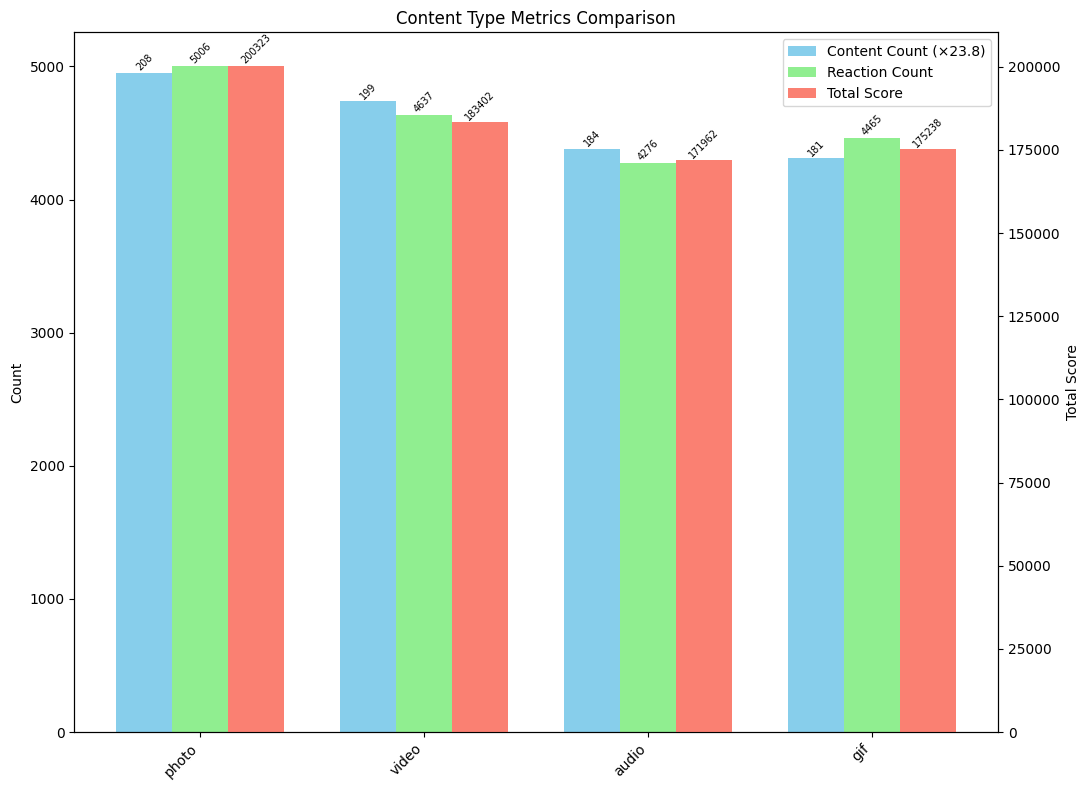

In [ ]:
def plot_clustered_bars(df):
    # Sort the dataframe by Content_Count in descending order
    df = df.sort_values('Content_Count', ascending=False).reset_index(drop=True)

    # Set the style and figure size
    # plt.style.use('seaborn')
    fig, ax1 = plt.subplots(figsize=(11, 8))

    # Calculate scaling factor to make Content_Count more visible
    # Scale Content_Count to be roughly in the same range as Reaction_Count
    scale_factor = df['Reaction_Count'].mean() / df['Content_Count'].mean()
    scaled_content = df['Content_Count'] * scale_factor

    # Calculate bar positions
    x = np.arange(len(df['Content_Type']))
    width = 0.25

    # Create bars with scaled Content_Count
    bars1 = ax1.bar(x - width, scaled_content, width, label=f'Content Count (×{scale_factor:.1f})', color='skyblue')
    bars2 = ax1.bar(x, df['Reaction_Count'], width, label='Reaction Count', color='lightgreen')

    # Create secondary y-axis for Total_Score
    ax2 = ax1.twinx()
    bars3 = ax2.bar(x + width, df['Total_Score'], width, label='Total Score', color='salmon')

    # Customize primary y-axis (Content and Reaction counts)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='y')

    # Customize secondary y-axis (Total Score)
    ax2.set_ylabel('Total Score')
    ax2.tick_params(axis='y')

    # Add value labels on top of bars with tilted orientation and smaller font
    def add_labels(bars, values, ax):
        for bar, val in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{val:.0f}',
                   ha='center', va='bottom', rotation=45,  # Changed to 45 degrees
                   fontsize=7)  # Kept small font size

    add_labels(bars1, df['Content_Count'], ax1)  # Show original values
    add_labels(bars2, df['Reaction_Count'], ax1)
    add_labels(bars3, df['Total_Score'], ax2)

    # Set x-axis labels and title
    ax1.set_xticks(x)
    ax1.set_xticklabels(df['Content_Type'], rotation=45, ha='right')
    plt.title('Content Type Metrics Comparison')

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    return fig

# Example usage:
plot_clustered_bars(content_type_group)
plt.show()

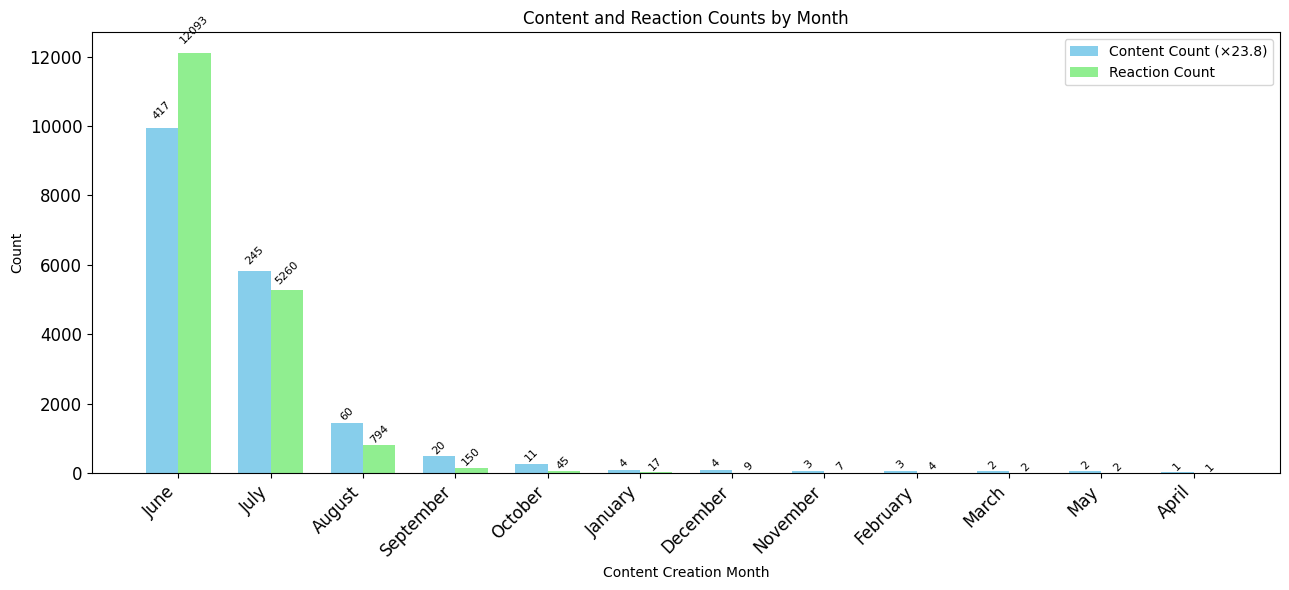

In [ ]:
def plot_clustered_bars(df):
    # Sort the dataframe by Content_Count in descending order
    df = df.sort_values('Content_Count', ascending=False).reset_index(drop=True)

    # Set the style and figure size
    # plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(13, 6))

    # Calculate scaling factor to make Content_Count more visible
    scale_factor = df['Reaction_Count'].mean() / df['Content_Count'].mean()
    scaled_content = df['Content_Count'] * scale_factor

    # Calculate bar positions
    x = np.arange(len(df['Content_Creation_Month']))
    width = 0.35  # Wider bars since we only have 2 metrics

    # Create bars with scaled Content_Count
    bars1 = ax.bar(x - width/2, scaled_content, width,
                   label=f'Content Count (×{scale_factor:.1f})',
                   color='skyblue')
    bars2 = ax.bar(x + width/2, df['Reaction_Count'], width,
                   label='Reaction Count',
                   color='lightgreen')

    # Add value labels on top of bars with tilted orientation and smaller font
    def add_labels(bars, values):
        for bar, val in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + (height * 0.02),
                   f'{val:.0f}',
                   ha='center', va='bottom', rotation=45,
                   fontsize=8)

    add_labels(bars1, df['Content_Count'])  # Show original values
    add_labels(bars2, df['Reaction_Count'])

    # Customize axes
    ax.set_ylabel('Count')
    ax.set_xlabel('Content Creation Month')
    ax.tick_params(axis='both', labelsize=12)  # Adjust tick label size

    # Set x-axis labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(df['Content_Creation_Month'], rotation=45, ha='right')
    plt.title('Content and Reaction Counts by Month')

    # Add legend
    ax.legend(loc='upper right')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    return fig

# Example usage:
plot_clustered_bars(content_creation_month_group)
plt.show()

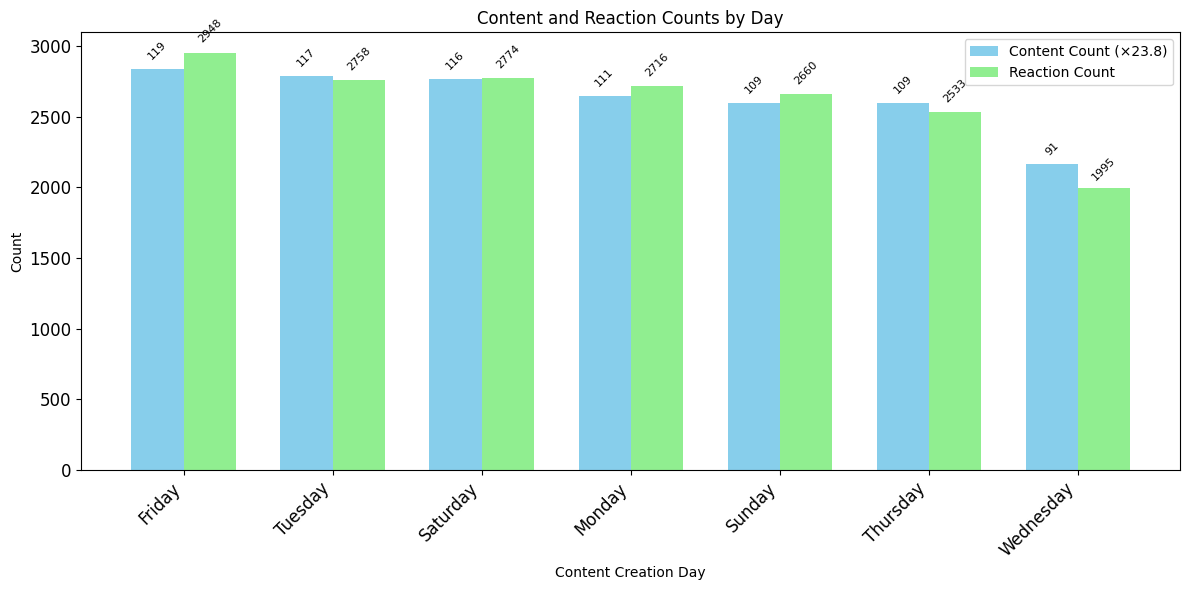

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_clustered_bars(df):
    # Sort the dataframe by Content_Count in descending order
    df = df.sort_values('Content_Count', ascending=False).reset_index(drop=True)

    # Set the style and figure size
    # plt.style.use('seaborn')
    fig, ax = plt.subplots(figsize=(12, 6))

    # Calculate scaling factor to make Content_Count more visible
    scale_factor = df['Reaction_Count'].mean() / df['Content_Count'].mean()
    scaled_content = df['Content_Count'] * scale_factor

    # Calculate bar positions
    x = np.arange(len(df['Content_Creation_Day']))
    width = 0.35  # Wider bars since we only have 2 metrics

    # Create bars with scaled Content_Count
    bars1 = ax.bar(x - width/2, scaled_content, width,
                   label=f'Content Count (×{scale_factor:.1f})',
                   color='skyblue')
    bars2 = ax.bar(x + width/2, df['Reaction_Count'], width,
                   label='Reaction Count',
                   color='lightgreen')

    # Add value labels on top of bars with tilted orientation and smaller font
    def add_labels(bars, values):
        for bar, val in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + (height * 0.02),
                   f'{val:.0f}',
                   ha='center', va='bottom', rotation=45,
                   fontsize=8)

    add_labels(bars1, df['Content_Count'])  # Show original values
    add_labels(bars2, df['Reaction_Count'])

    # Customize axes
    ax.set_ylabel('Count')
    ax.set_xlabel('Content Creation Day')
    ax.tick_params(axis='both', labelsize=12)  # Adjust tick label size

    # Set x-axis labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(df['Content_Creation_Day'], rotation=45, ha='right')
    plt.title('Content and Reaction Counts by Day')

    # Add legend
    ax.legend(loc='upper right')

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    return fig

# Example usage:
plot_clustered_bars(content_creation_day_group)
plt.show()